In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import  davies_bouldin_score
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('df.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,month,VendorID
0,2.30,1.0,8.5,3.0,1.85,0.3,14.15,6.866667,2020,1,1.0
1,1.30,1.0,7.5,2.5,2.15,0.3,12.95,8.383333,2020,1,1.0
2,1.20,1.0,6.0,3.0,1.95,0.3,11.75,4.700000,2021,1,1.0
3,1.04,1.0,7.5,0.0,1.00,0.3,11.80,9.283333,2020,1,2.0
4,1.80,2.0,9.0,2.5,0.00,0.3,12.30,10.050000,2020,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4283208,0.93,1.0,9.0,0.0,3.69,0.3,15.99,12.850000,2019,12,2.0
4283209,1.18,1.0,12.5,0.0,3.16,0.3,18.96,18.783333,2019,12,2.0
4283210,0.99,1.0,7.0,0.0,2.00,0.3,12.30,8.966667,2019,12,2.0
4283211,2.83,1.0,13.0,0.5,3.36,0.3,20.16,16.283333,2019,12,2.0


In [3]:
columns_to_scale = ['trip_distance', 'payment_type', 'fare_amount', 
                    'extra', 'tip_amount',
                    'improvement_surcharge', 'total_amount',
                    'trip_time' ]
non_scaled_columns = list(set(df.columns) - set(columns_to_scale))
df_scaled = df.copy()

scaler = StandardScaler()

df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
df_scaled.drop(columns=['year', 'month'], inplace=True)
df_scaled

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID
0,0.630549,-0.564552,-0.063981,1.454490,0.117677,-4.440892e-16,0.033430,-0.591496,1.0
1,-0.356468,-0.564552,-0.353464,1.056498,0.350956,-4.440892e-16,-0.259669,-0.303894,1.0
2,-0.455170,-0.564552,-0.787688,1.454490,0.195437,-4.440892e-16,-0.552768,-1.002356,1.0
3,-0.613093,-0.564552,-0.353464,-0.933461,-0.543281,-4.440892e-16,-0.540556,-0.133229,2.0
4,0.137041,1.702257,0.080761,1.056498,-1.320878,-4.440892e-16,-0.418431,0.012152,1.0
...,...,...,...,...,...,...,...,...,...
4283208,-0.721664,-0.564552,0.080761,-0.933461,1.548456,-4.440892e-16,0.482848,0.543109,2.0
4283209,-0.474910,-0.564552,1.093952,-0.933461,1.136330,-4.440892e-16,1.208268,1.668233,2.0
4283210,-0.662443,-0.564552,-0.498205,-0.933461,0.234317,-4.440892e-16,-0.418431,-0.193278,2.0
4283211,1.153669,-0.564552,1.238693,-0.535470,1.291849,-4.440892e-16,1.501367,1.194164,2.0


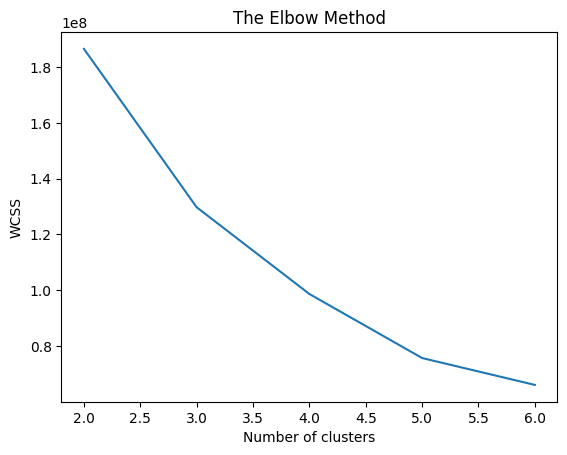

In [4]:
wcss = []
for i in range(2, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
df_kmeans = df_scaled.copy()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_kmeans)
df_kmeans['cluster'] = kmeans_labels
df_kmeans

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID,cluster
0,0.630549,-0.564552,-0.063981,1.454490,0.117677,-4.440892e-16,0.033430,-0.591496,1.0,0
1,-0.356468,-0.564552,-0.353464,1.056498,0.350956,-4.440892e-16,-0.259669,-0.303894,1.0,0
2,-0.455170,-0.564552,-0.787688,1.454490,0.195437,-4.440892e-16,-0.552768,-1.002356,1.0,0
3,-0.613093,-0.564552,-0.353464,-0.933461,-0.543281,-4.440892e-16,-0.540556,-0.133229,2.0,3
4,0.137041,1.702257,0.080761,1.056498,-1.320878,-4.440892e-16,-0.418431,0.012152,1.0,2
...,...,...,...,...,...,...,...,...,...,...
4283208,-0.721664,-0.564552,0.080761,-0.933461,1.548456,-4.440892e-16,0.482848,0.543109,2.0,3
4283209,-0.474910,-0.564552,1.093952,-0.933461,1.136330,-4.440892e-16,1.208268,1.668233,2.0,1
4283210,-0.662443,-0.564552,-0.498205,-0.933461,0.234317,-4.440892e-16,-0.418431,-0.193278,2.0,3
4283211,1.153669,-0.564552,1.238693,-0.535470,1.291849,-4.440892e-16,1.501367,1.194164,2.0,1


In [6]:
features = df_kmeans.columns
cluster_description = df_kmeans.groupby('cluster')[features].mean()
cluster_description


,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID,cluster
cluster,,,,,,,,,,
0,-0.442743,-0.564515,-0.457363,1.298955,0.184888,-4.440892e-16,-0.325098,-0.428932,1.000000,0.0
1,1.262260,-0.261837,1.364783,-0.056519,0.730218,-4.440892e-16,1.385758,1.270580,1.683123,1.0
2,-0.369548,1.740586,-0.362754,-0.010145,-1.320828,-4.440892e-16,-0.728138,-0.312013,1.641622,2.0
3,-0.447536,-0.564552,-0.519202,-0.704326,0.175965,-4.440892e-16,-0.383500,-0.497574,2.000000,3.0


In [7]:
df_minibatch = df_scaled.copy()
minibatch_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42)
minibatch_kmeans_labels = minibatch_kmeans.fit_predict(df_minibatch)
df_minibatch['cluster'] = minibatch_kmeans_labels
df_minibatch

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID,cluster
0,0.630549,-0.564552,-0.063981,1.454490,0.117677,-4.440892e-16,0.033430,-0.591496,1.0,1
1,-0.356468,-0.564552,-0.353464,1.056498,0.350956,-4.440892e-16,-0.259669,-0.303894,1.0,1
2,-0.455170,-0.564552,-0.787688,1.454490,0.195437,-4.440892e-16,-0.552768,-1.002356,1.0,1
3,-0.613093,-0.564552,-0.353464,-0.933461,-0.543281,-4.440892e-16,-0.540556,-0.133229,2.0,2
4,0.137041,1.702257,0.080761,1.056498,-1.320878,-4.440892e-16,-0.418431,0.012152,1.0,0
...,...,...,...,...,...,...,...,...,...,...
4283208,-0.721664,-0.564552,0.080761,-0.933461,1.548456,-4.440892e-16,0.482848,0.543109,2.0,3
4283209,-0.474910,-0.564552,1.093952,-0.933461,1.136330,-4.440892e-16,1.208268,1.668233,2.0,3
4283210,-0.662443,-0.564552,-0.498205,-0.933461,0.234317,-4.440892e-16,-0.418431,-0.193278,2.0,2
4283211,1.153669,-0.564552,1.238693,-0.535470,1.291849,-4.440892e-16,1.501367,1.194164,2.0,3


In [8]:
features = df_minibatch.columns
cluster_description = df_minibatch.groupby('cluster')[features].mean()
cluster_description


,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID,cluster
cluster,,,,,,,,,,
0,0.805873,1.680653,0.930252,-0.079376,-1.320684,-4.440892e-16,0.365097,0.911912,1.680031,0.0
1,-0.560579,-0.031262,-0.593770,1.293997,-0.204926,-4.440892e-16,-0.564156,-0.566918,1.000000,1.0
2,-0.570012,-0.065766,-0.658964,-0.712992,-0.202252,-4.440892e-16,-0.623061,-0.634989,2.000000,2.0
3,0.991146,-0.564537,1.099167,-0.050396,1.014502,-4.440892e-16,1.252232,1.048265,1.682041,3.0


In [9]:
df_gmm = df_scaled.copy()
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df_gmm)
df_gmm['cluster'] = gmm_labels
df_gmm

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID,cluster
0,0.630549,-0.564552,-0.063981,1.454490,0.117677,-4.440892e-16,0.033430,-0.591496,1.0,0
1,-0.356468,-0.564552,-0.353464,1.056498,0.350956,-4.440892e-16,-0.259669,-0.303894,1.0,0
2,-0.455170,-0.564552,-0.787688,1.454490,0.195437,-4.440892e-16,-0.552768,-1.002356,1.0,0
3,-0.613093,-0.564552,-0.353464,-0.933461,-0.543281,-4.440892e-16,-0.540556,-0.133229,2.0,3
4,0.137041,1.702257,0.080761,1.056498,-1.320878,-4.440892e-16,-0.418431,0.012152,1.0,2
...,...,...,...,...,...,...,...,...,...,...
4283208,-0.721664,-0.564552,0.080761,-0.933461,1.548456,-4.440892e-16,0.482848,0.543109,2.0,3
4283209,-0.474910,-0.564552,1.093952,-0.933461,1.136330,-4.440892e-16,1.208268,1.668233,2.0,3
4283210,-0.662443,-0.564552,-0.498205,-0.933461,0.234317,-4.440892e-16,-0.418431,-0.193278,2.0,3
4283211,1.153669,-0.564552,1.238693,-0.535470,1.291849,-4.440892e-16,1.501367,1.194164,2.0,3


In [10]:
features = df_gmm.columns
cluster_description = df_gmm.groupby('cluster')[features].mean()
cluster_description


,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID,cluster
cluster,,,,,,,,,,
0,-0.014631,-0.564552,0.014913,1.296897,0.410559,-4.440892e-16,0.143634,0.017765,1.000000,0.0
1,-0.085685,2.695119,-0.088468,0.814878,-0.904524,-4.440892e-16,-0.277801,-0.116526,1.237406,1.0
2,-0.063295,1.702257,-0.050780,-0.036759,-1.320878,-4.440892e-16,-0.464369,-0.036868,1.655915,2.0
3,0.040179,-0.564552,0.017982,-0.695988,0.439248,-4.440892e-16,0.154338,0.009893,2.000000,3.0


In [11]:
davies_bouldin_kmeans = davies_bouldin_score(df_kmeans, kmeans_labels)
davies_bouldin_kmeans

0.8896190139297165

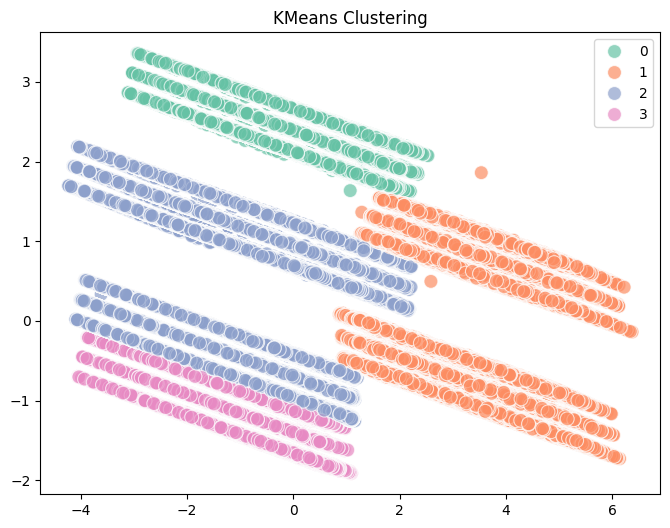

In [12]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_kmeans)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=kmeans_labels, palette="Set2", s=100, alpha=0.7)
plt.title('KMeans Clustering')
plt.show()

In [13]:
davies_bouldin_minibatch = davies_bouldin_score(df_minibatch, minibatch_kmeans_labels)
davies_bouldin_minibatch

1.053491931601408

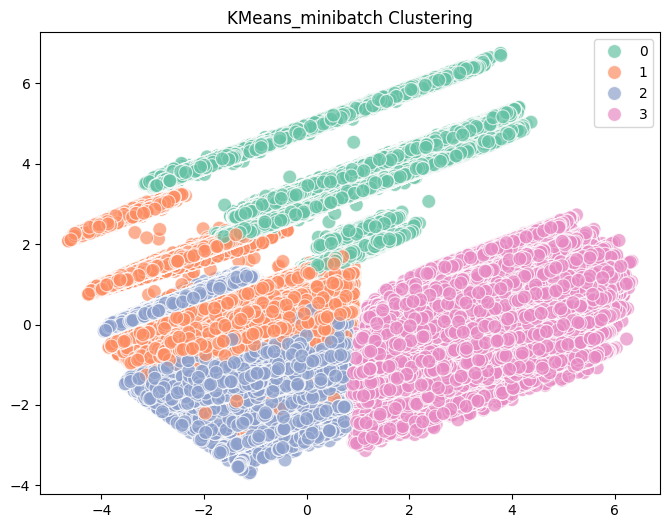

In [14]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_minibatch)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=minibatch_kmeans_labels, palette="Set2", s=100, alpha=0.7)
plt.title('KMeans_minibatch Clustering')
plt.show()

In [15]:
davies_bouldin_gmm = davies_bouldin_score(df_gmm, gmm_labels)
davies_bouldin_gmm

2.132065813243735

C:\Users\Тася\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


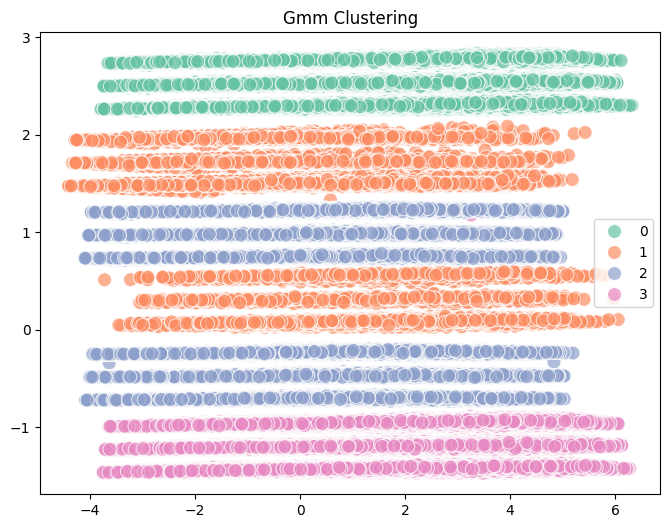

In [16]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_gmm)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=gmm_labels, palette="Set2", s=100, alpha=0.7)
plt.title('Gmm Clustering')
plt.show()



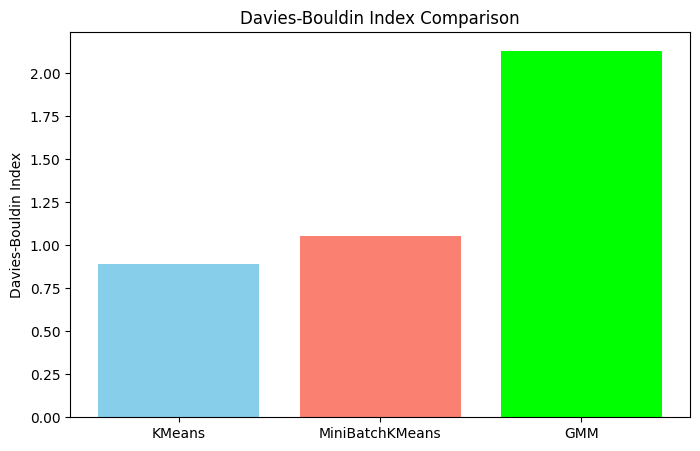

In [17]:
db_scores = {
    'KMeans': davies_bouldin_kmeans,
    'MiniBatchKMeans': davies_bouldin_minibatch,
    'GMM': davies_bouldin_gmm
}

plt.figure(figsize=(8, 5))
plt.bar(db_scores.keys(), db_scores.values(), color=['skyblue', 'salmon', 'lime'])
plt.title('Davies-Bouldin Index Comparison')
plt.ylabel('Davies-Bouldin Index')
plt.show()


In [19]:
cluster_characteristics = df_kmeans.groupby('cluster').mean()
cluster_characteristics
    

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,VendorID
cluster,,,,,,,,,
0,-0.442743,-0.564515,-0.457363,1.298955,0.184888,-4.440892e-16,-0.325098,-0.428932,1.000000
1,1.262260,-0.261837,1.364783,-0.056519,0.730218,-4.440892e-16,1.385758,1.270580,1.683123
2,-0.369548,1.740586,-0.362754,-0.010145,-1.320828,-4.440892e-16,-0.728138,-0.312013,1.641622
3,-0.447536,-0.564552,-0.519202,-0.704326,0.175965,-4.440892e-16,-0.383500,-0.497574,2.000000


Кластер 0: "Короткие бюджетные поездки"
Основные характеристики:
Короткая длина поездки.
Минимальная стоимость.
Небольшие чаевые или их отсутствие.
Кластер 1: "Недорогие поездки средней длины"
Основные характеристики:
Длина поездки немного больше, чем у кластеров с короткими поездками.
Все еще недорогие, чаевые невелики.
Преобладают поездки с экономичным типом оплаты.
Кластер 2: "Длинные премиальные поездки"
Основные характеристики:
Самая длинная длина поездок.
Высокая общая стоимость, включая значительные чаевые.
Чаще используется наличный расчет.
Кластер 3: "Дорогие поездки средней длины"
Основные характеристики:
Поездки средней длины, но с высокой стоимостью.
Значительные чаевые.
Оплата чаще производится наличными.


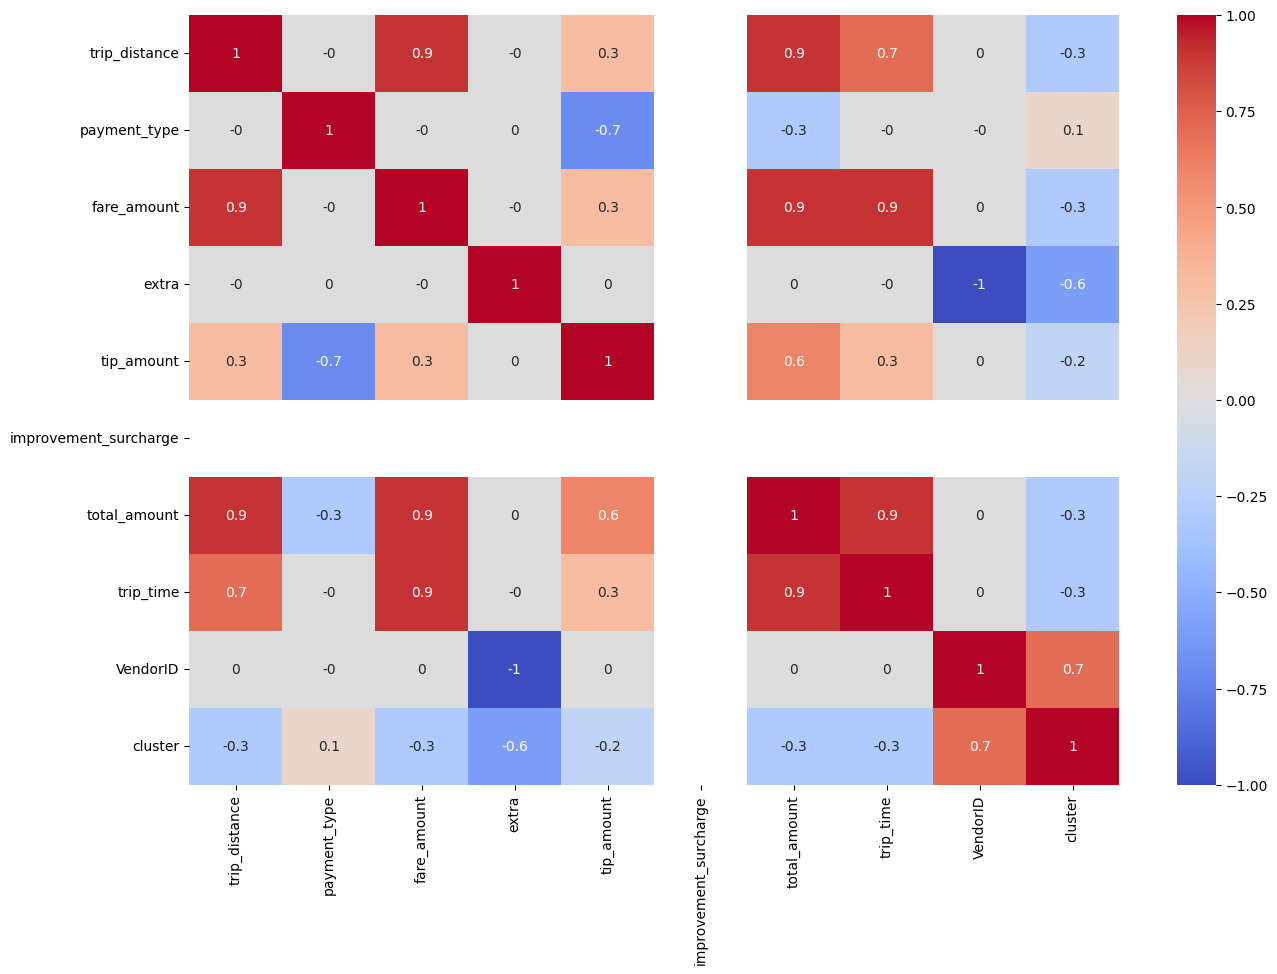

In [20]:
plt.figure(figsize=(15, 10))
correlation = round(df_kmeans.corr(), 1)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [22]:
df_w_clusters = df.copy()
df_w_clusters['cluster'] = df_kmeans['cluster']
df_w_clusters.drop(columns='month',inplace=True)
df_w_clusters

,trip_distance,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,trip_time,year,VendorID,cluster
0,2.30,1.0,8.5,3.0,1.85,0.3,14.15,6.866667,2020,1.0,0
1,1.30,1.0,7.5,2.5,2.15,0.3,12.95,8.383333,2020,1.0,0
2,1.20,1.0,6.0,3.0,1.95,0.3,11.75,4.700000,2021,1.0,0
3,1.04,1.0,7.5,0.0,1.00,0.3,11.80,9.283333,2020,2.0,3
4,1.80,2.0,9.0,2.5,0.00,0.3,12.30,10.050000,2020,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
4283208,0.93,1.0,9.0,0.0,3.69,0.3,15.99,12.850000,2019,2.0,3
4283209,1.18,1.0,12.5,0.0,3.16,0.3,18.96,18.783333,2019,2.0,1
4283210,0.99,1.0,7.0,0.0,2.00,0.3,12.30,8.966667,2019,2.0,3
4283211,2.83,1.0,13.0,0.5,3.36,0.3,20.16,16.283333,2019,2.0,1


In [23]:
df_w_clusters.to_csv('df_w_clusters.csv')